# Introduction

This analysis concerns Imperial (Imperial College London) iGEM's form **Perspectives on Synthetic Biology:  Public Awareness & Trust**

Analysis was performed by Povilas Šaučiuvienas (@Sauciu1) on 18-09 2025.

Notable amendments (date):
    None

### Form background

The form was created by Szonja Skenderovic on ~10-09 2025 in partnership with iGEM teams from Yale and MIT-MAHE.

Forms is/was accessible on: https://docs.google.com/forms/d/1O7QRPuyY1qxkLvJNcD5lfhRjfv0EN9P5bYNCSFxFzhg/edit
* Form has closed on 17-09-2025 and ran for ~ a week.
* No personal-identifiable data was collected.

Similar information should've been collected by Yale and MIT-MAHE. However, I've not yet access to the data.

* On ~14-09-2025, I have performed slight restructuring of the form, to make it more amiable towards data analysis (conversion of quantitative to qualitative questions). However, in spirit of maintaining similarity with forms from mother groups, more serious changes could not be carried out.

As far as I'm aware, information was collected almost exclusively in Europe (will likely be more negatively biased than the US market).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from src.plot_helpers import fraction_plot, drop_parenthesis, df_display

#pd.set_option('display.width', 200)
pd.set_option('display.max_colwidth', 150)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)

In [2]:
FIGSIZE = (6,4)
TIGHT_KW = dict(pad=0.1)
sns.set_style('whitegrid')

For simplicity, questions will be accessed by their id (.iloc[row, col]) instead of changing names

## Data cleaning

In [3]:
df = pd.read_csv('data/HP/Perspectives on Synthetic Biology.csv')
cols = df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 25 columns):
 #   Column                                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                                --------------  -----  
 0   Timestamp                                                                                                                             40 non-null     object 
 1   How familiar are you with the area of synthetic biology?                                                                              40 non-null     object 
 2   Which of the following applications of synthetic biology are you already familiar with?                                               36 non-null     object 
 3   Would you be willing to eat food grown using synthetic biology (e.g., cultiva

* Inappropriate datatype, will require recasting.

In [4]:
df.tail(2)

,Timestamp,How familiar are you with the area of synthetic biology?,Which of the following applications of synthetic biology are you already familiar with?,"Would you be willing to eat food grown using synthetic biology (e.g., cultivated/lab-grown meat, GM crops)?",Why or why not?,Where did you find this survey?,What is your age?,What is your gender?,What is your highest education level achieved?,How concerned are you about possible risks of synthetic biology?,...,"What would help you feel more connected to the science being done in your country, and to the field of synthetic biology as a whole?",How important do you think it is for the public to be involved in decisions about how synthetic biology is used?,How much say should ordinary citizens have in decisions about synthetic biology?,Do you believe public policy should influence scientific research,What limits should we place on synthetic biology research to ensure it is ethical?,Are there areas where you think synthetic biology should never be applied?\n,"In 50 years, if synthetic biology could completely reshape how we live, what change would you most want to see?",Have you ever changed your opinion about a scientific issue? What changed it?,“I would support funding for synthetic biology research.”,Any final thoughts?\n
38,2025/09/17 2:10:53 pm CET,3,"Medicine (e.g., vaccines, insulin);Climate & Environment (e.g., plastic-eating bacteria);Other",Yes,"Because it is still meat so why not, it would be required to pass regulations",Instagram,20.0,Male,Masters,1,...,NaN,3,3,2.0,NaN,NaN,Increase our lifespan through longevity practices,I always trusted science,5,NaN
39,2025/09/17 10:56:30 pm CET,4,"Medicine (e.g., vaccines, insulin)",Yes,"✅ gene guns 🥵🤪🥰\n✅ ""I miss my wife @CathyTie"". (2025, June 13). Retrieved September 17, 2025, from https://x.com/Jiankui_He/status/193347766812273...",the strange white guy. Pavilas or something.,21.0,Intensidysphoric,Bachelors,4,...,NaN,2,2,1.0,Let me fix that for you:\nHow shall synthetic biology research ensure ethics shall not hinder it ever again?,"See above (Section 2, third question)","See above (Section 1, point about goths)","Life, man. Life.",5,"Other than the retarded way this was written, I stand by all of the answers. If deciphering the open questions is too hard, at least use the multi..."



One of the participants was excluded, because of answers that could be defined as "Trolling"

In [5]:
print(df.iloc[39,:].values)  # IGNORE
df = df.iloc[:39, :]

['2025/09/17 10:56:30 pm CET' '4' 'Medicine (e.g., vaccines, insulin)'
 'Yes'
 '✅ gene guns 🥵🤪🥰\n✅ "I miss my wife @CathyTie". (2025, June 13). Retrieved September 17, 2025, from https://x.com/Jiankui_He/status/1933477668122734643\n✅ Monsanto v2 📈📈📈\n✅ GOD IS DEAD. BOW TO MAN. 🧬⚙️\n✅ Potential for lab-grown single-use subscription-model furry goth gfs? Hell yeah (organic bio free-range)\n📉📉📉 bioterrorism is (soon to be) the new cool thing baby, this would make it harder ;(('
 'the strange white guy. Pavilas or something. ' np.float64(21.0)
 'Intensidysphoric' 'Bachelors' '4' 'Yes'
 "Everything will be weaponized sooner or later. You may resist/ban GM [europapa things ;p] - won't stop china from completely destroying your agricultural sector when the time comes (i just hope they don't ban temu 🙏🙏🙏)"
 '3'
 "Depends. AI slop has already infested the field. And even the top journals 'can't fully check everything uwu'. Hold on, the blue helmet shadow people are here. No officer it wasnt me.

Emojis were also removed

# EDA
As the data will not be used for model generation and includes relatively few responses ~40, data cleaning is performed ad hoc will not be exclusively separated.

**Free input fields are too varied for valuable comparison, given the dataset size. They can be used as anecdotal evidence only.**

## General Info

#### Timestamp

<Figure size 600x400 with 0 Axes>

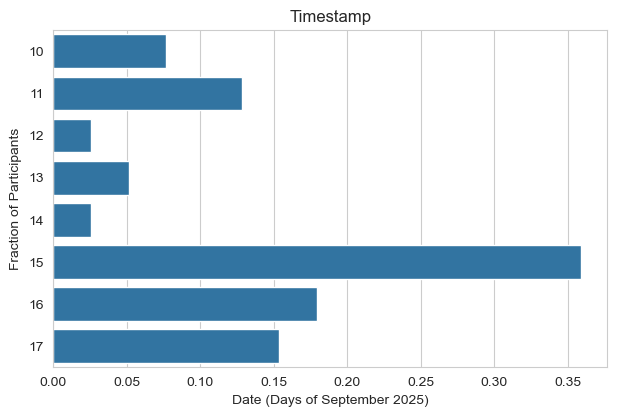

In [6]:
plt.figure(figsize=FIGSIZE)
dates = pd.to_datetime(df['Timestamp'].dropna(), format="%Y/%m/%d %I:%M:%S %p %Z", errors='coerce').dt.date


dates_series = pd.Series([d.day for d in dates])
df_temp = pd.DataFrame({'day': dates_series})
fraction_plot(df_temp, 0, df.columns[0])
plt.xlabel('Date (Days of September 2025)')
plt.tight_layout(**TIGHT_KW)

Majority of participant responses were collected during the last day of the survey.

#### How familiar are you with the area of synthetic biology?

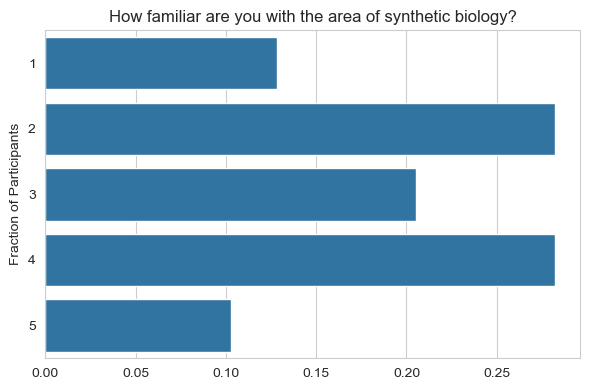

In [7]:
fam_map = {
    'Very knowledgeable': 5,
    'Good amount of knowledge': 4,
    'Basic knowledge': 3,
    'Know of the term': 2,
    'No knowledge': 1,
    **{f"{i}": i for i in range(1, 6)}
}

df[df.columns[1]] = pd.to_numeric(df[df.columns[1]].map(fam_map), errors='coerce').astype('Int64')


fraction_plot(df, 1, df.columns[1])

* Most people seemed at least somewhat familiar with synthetic biology.
* Considering the collection procedure used was aimed at university students, this sample cannot be considered representative for the wider population. 

#### Which of the following applications of synthetic biology are you already familiar with?

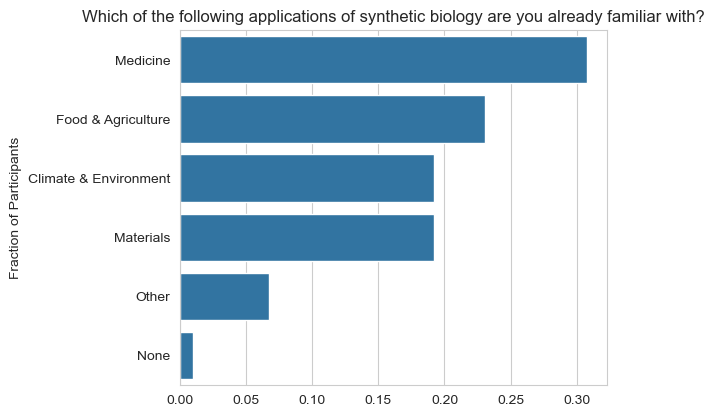

In [8]:
fam = df.iloc[:, 2].dropna()
fam = fam.apply(drop_parenthesis)
fam = [fam.split(";") for fam in fam]
fam_flat = [item.strip() for sublist in fam for item in sublist]

df_temp = pd.DataFrame({'responses': fam_flat})
fraction_plot(df_temp, 0, df.columns[2])
plt.tight_layout(**TIGHT_KW)

* Majority consider it relevant for Medicine.
    * On real world application.

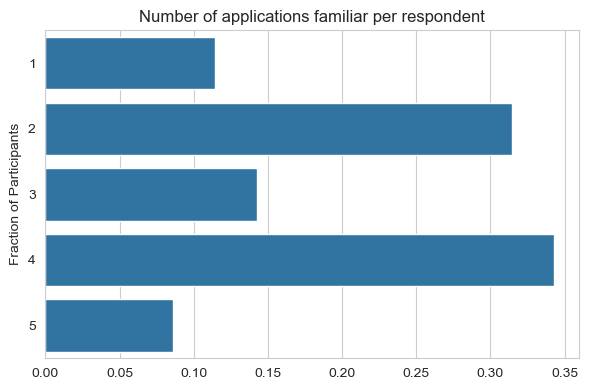

In [9]:
fam_len = [len(el) for el in fam]
fraction_plot(pd.DataFrame({'num_families': fam_len}), 0, 'Number of applications familiar per respondent')

#### Would you be willing to eat food grown using synthetic biology (e.g., cultivated/lab-grown meat, GM crops)? 

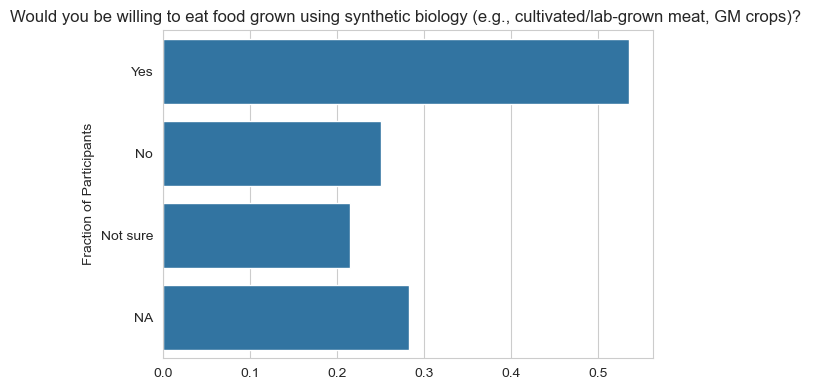

In [10]:
fraction_plot(df, 3, df.columns[3])

####  Why or why not?

In [11]:
df_display(df, 4)

,Why or why not?
0,Not likely to try as the long-term effects of GMO have not yet been studied extensively
1,"No TT, bc subconsciously I would think they are not as healthy as organic food. And safety concerns about food grown by synbiology are also critical."
2,Yes. But I work in synbio so I don’t know if that counts. Hard to say about lab grown meat because that hasn’t reached the market (although I woul...
3,"100%, it’s the future and it (has the potential to be) better for the climate, for our health, it’d be a more ethical option and should also be ch..."
4,"Yes. Synthetic biology based foods can be an effective way to address a growing food insecurity crisis and can be safe, tasty, and nutritious if d..."
5,"Unless there are studies that fully explore any health problems that the food will cause and they is not significant, I would not eat it."
6,Lab grown meat probably not - texture issues
7,Yes - I think my worry about the climate has overtaken the inherent ickiness
8,"Yes, if produced to high quality, and made to replicate the structure of the natural variety it seems reasonable that these can be consumed as well"
9,"Definitely! Food is a source of nutrients regardless of where it is grown, the important thing is to ensure one is getting the proteins, cards, li..."


* Pro / Accepting: 14
* Hesitant / Safety-concerned: 11
* Anti / Refuse: 4
* Neutral / Curious / Indifferent: 5

In [ ]:
df_display(df, 4)

,Why or why not?
0,Not likely to try as the long-term effects of GMO have not yet been studied extensively
1,"No TT, bc subconsciously I would think they are not as healthy as organic food. And safety concerns about food grown by synbiology are also critical."
2,Yes. But I work in synbio so I don’t know if that counts. Hard to say about lab grown meat because that hasn’t reached the market (although I woul...
3,"100%, it’s the future and it (has the potential to be) better for the climate, for our health, it’d be a more ethical option and should also be ch..."
4,"Yes. Synthetic biology based foods can be an effective way to address a growing food insecurity crisis and can be safe, tasty, and nutritious if d..."
5,"Unless there are studies that fully explore any health problems that the food will cause and they is not significant, I would not eat it."
6,Lab grown meat probably not - texture issues
7,Yes - I think my worry about the climate has overtaken the inherent ickiness
8,"Yes, if produced to high quality, and made to replicate the structure of the natural variety it seems reasonable that these can be consumed as well"
9,"Definitely! Food is a source of nutrients regardless of where it is grown, the important thing is to ensure one is getting the proteins, cards, li..."


* Climate & Ethics (6): See synbio foods as future, sustainable, ethical (3, 4, 7, 9, 10, 18).

* Nutrition & Practical Benefits (5): Value nutrients, energy, cost, or societal benefits (8, 20, 23, 26, 32, 34, 38).

* Curiosity / Neutral (4): Interested in taste, novelty, or indifferent (15, 16, 17, 30).

* Health & Safety Concerns (9): Worry about long-term effects, health risks, processed foods (0, 1, 5, 12, 13, 21, 24, 28, 31).

* Negative / Distrust (5): Unnatural, not “real food,” lack of trust, conspiracy (22, 25, 29, 35, 36).

#### Where did you find this survey?

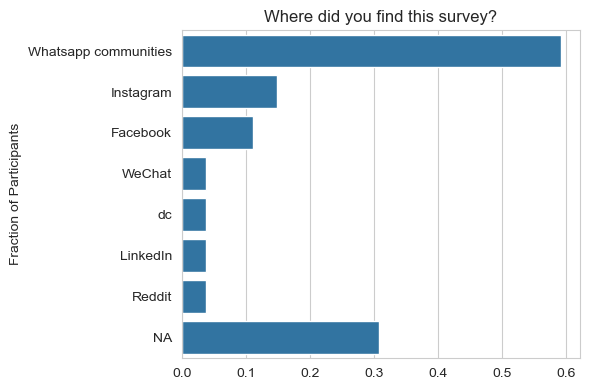

In [13]:
fraction_plot(df, 5, df.columns[5])

#### What is your age?

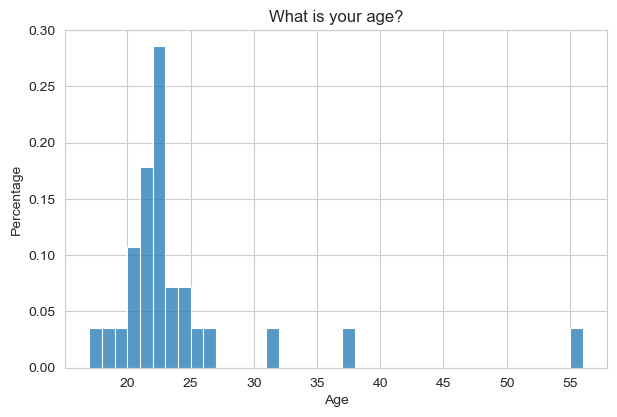

In [ ]:
plt.figure(figsize=FIGSIZE)

df[df.columns[6]] = pd.to_numeric(df[df.columns[6]], errors='coerce').astype('Int64')
sns.histplot(df.iloc[:, 6].dropna(), binwidth=1, kde=False, stat='probability')
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.title(df.columns[6])
plt.tight_layout(**TIGHT_KW)

* Younger individuals (students) are overrepresented.

#### What is your gender?

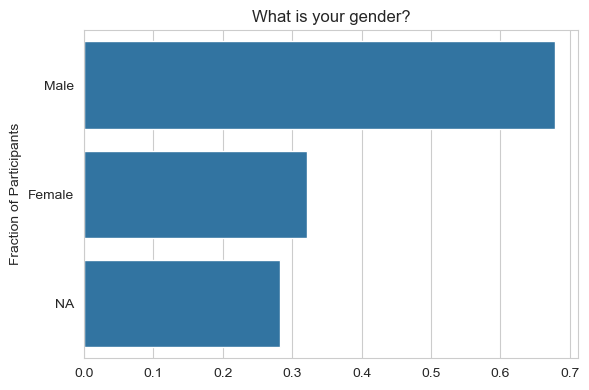

In [15]:
fraction_plot(df, 7, df.columns[7])

#### What is your highest education level achieved?

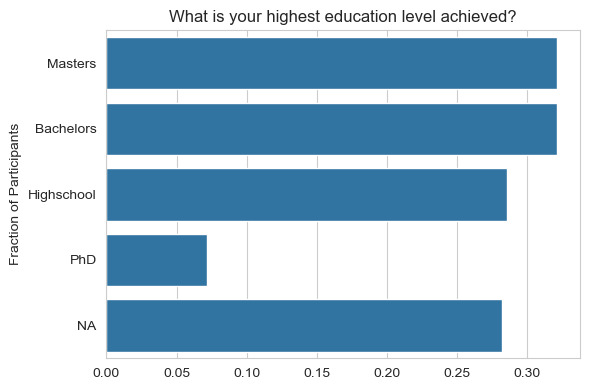

In [16]:
fraction_plot(df, 8, df.columns[8])

* Participation of masters unexpected

#### How concerned are you about possible risks of synthetic biology?

['Slightly', 'Very concerned', 'Slightly', 'Slightly', 'Moderately', 'Moderately', 'Slightly', 'Slightly', 'Slightly', 'Very concerned', 'Moderately', '3', '2', '3', '4', '2', '2', '2', '2', '3', '1', '5', '2', '3', '2', '4', '3', '3', '3', '5', '5', '3', '4', '4', '2', '5', '5', '2', '1']


<Figure size 600x400 with 0 Axes>

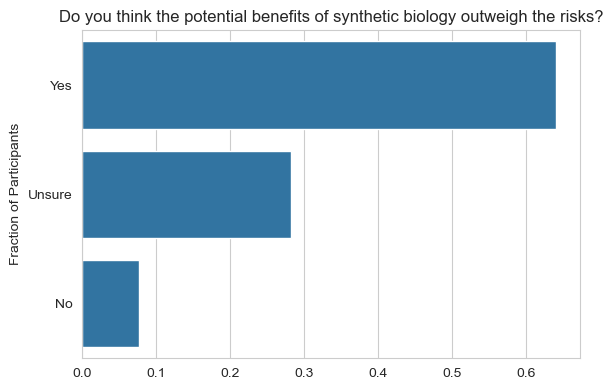

In [17]:
plt.figure(figsize=FIGSIZE)
print(df.iloc[:, 9].dropna().to_list())

fraction_plot(df, 10, df.columns[10])

#### Do you think the potential benefits of synthetic biology outweigh the risks?

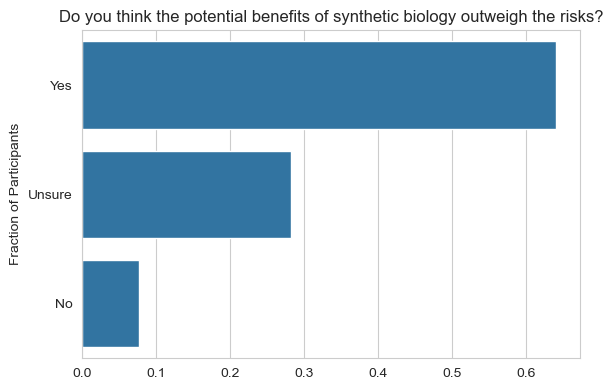

In [18]:
fraction_plot(df, 10, df.columns[10])

####  Why or why not?.1

In [19]:
df_display(df, 11)

,Why or why not?.1
0,"Given the pollution that people have created, surely something created spedcifically to fight it cannot be more harmful"
1,Synbiology is beautiful and cool 😎. It has done so much good for us. So I believe we need to develop it- it’s worth the risk:)
2,"If we think of a sustainable future, it is basically impossible to achieve without shifting to a bio economy and innovation in synthetic biology i..."
3,It has the potential to do so much good and its still very much hard for a member of the public to generate a bio threat using synbio toolkits.
4,"Synthetic biology, like many tools, has the potential to do an incredible amount of good and a large amount of damage. However, the positive impac..."
5,For medicine for example synthetic biology offers an invaluable contribution.
6,I don’t know what the potential benefits are (or the risks tbf).
7,Concerns about food security and climate impact feel like they need a reform on how food is produced
8,"Synthetic biology has the potential to help alleviate a lot of humanitarian issues that we are seeing in the world today, and that is worth the risk"
9,Benefits are enormous... the risks mainly dwell on the dark side of humanity since SynBio is a dual use technology. The risks can be addressed th...


**Advantages**
- Climate & sustainability: addresses pollution, food security, efficient farming, climate crisis (0, 2, 7, 23, 27, 34)  
- Medicine & health: new treatments, neurodivergent conditions, safer biologics (5, 10, 24)  
- Ethics & welfare: reduces animal killing, improves quality of life (20, 25)  
- Progress & innovation: essential for future, bio-economy, humanitarian benefits, cost efficiency (1, 3, 8, 9, 13, 18, 21, 30, 33, 38)  

**Concerns**
- Dual-use & safety: bio-threats, toxic leaks, Covid-like risks (3, 9, 14, 15, 16, 22, 29, 33)  
- Unknowns: side effects, lack of education, “too early to say” (6, 11, 12, 26, 28, 31, 32)  
- Distrust & negativity: government control, poisoning water, moral gray zone (29, 35, 36)  


#### How much do you trust science today compared to a few years ago?

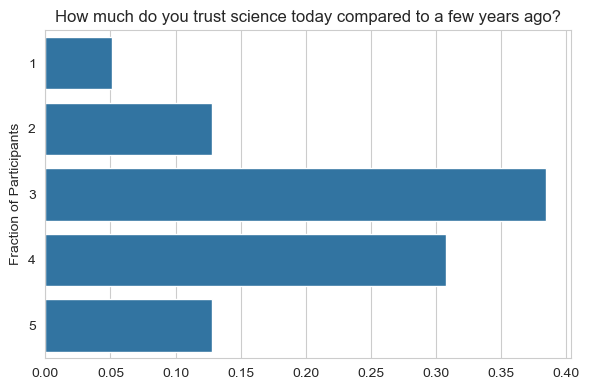

In [20]:
df.iloc[:,12]

trust_map = {
    'A lot more than in the past': 5,
    'More': 4,
    'About the same': 3,
    'Slightly': 2,
    'Less': 1,
    'A lot less than in the past': 0,
    **{str(i): i for i in range(6)}
}
df[df.columns[12]] = pd.to_numeric(df[df.columns[12]].map(trust_map), errors='coerce').astype('Int64')


fraction_plot(df, 12, df.columns[12])

#### Why? (has your opinion changed)

In [21]:
df_display(df, 13)

,Why?
0,I am a scientist. I have always trusted it (to an extent)
1,"I’m also in this field so I have to trust it😭and the more I learn about science, the more I realize how little I know—human exploration of science..."
2,I got a bachelors in science and started my PhD so I just understand it more.
3,No change
5,"Due to AI, science improved a lot very quickly in the past couple of years."
6,Time will tell with science not the age at which it’s produced.
7,I have confidence in the safeguards and the review process behind new developments
8,"I haven’t been given any reason to change my stance science, I still believe it should be taken with caution if it is recent discoveries, but as m..."
9,"Science dwells on facts, science is self correcting... science is ever advancing humanity's interests. While some mistakes may occur, science is a..."
10,Because of having much more evidence to prove any current and incoming principles with higher standard methodology


**Reasons for more trust / positive views**
- Personal involvement or education in science (0, 1, 2, 20, 22, 25)  
- Self-correcting, evidence-based, advancing humanity (7, 8, 9, 10, 16, 18, 26, 28, 33, 38)  
- Technological and AI advances improving methods and speed (5, 11, 13, 14, 15, 30, 34)  
- More diversity and representation in research (12)  

**Reasons for skepticism / less trust**
- Influence of vested interests and corporations (21, 29, 37)  
- Fake news, propaganda, misinformation (17, 23, 27)  
- Distrust in institutions, politics, or transparency (24, 31, 35, 36)  

**Neutral / no change**
- No significant change or still case-by-case (3, 6, 19, 26, 28, 32)  


#### What factor most influences your trust in biology related technologies?

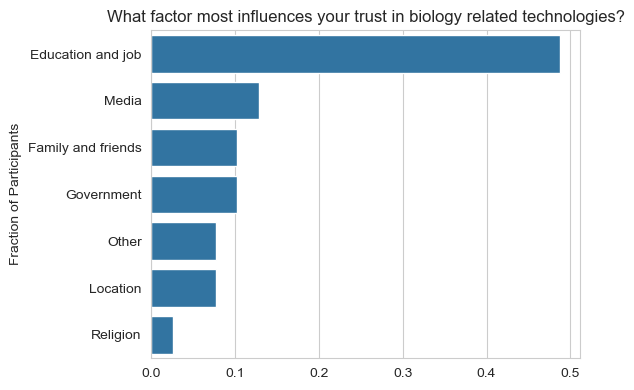

In [22]:
fraction_plot(df, 14, df.columns[14])

* These numbers are on track for bio students - they have been the most bioscience-embracing demographic for a long time.
    * Would likely be entirely different in more representative sample.

#### What would help you feel more connected to the science being done in your country, and to the field of synthetic biology as a whole?

In [23]:
plt.figure(figsize=FIGSIZE)
print(df.iloc[:, 15].dropna().to_list())

['More exposure in mass media (e.g. guardian, telegraph, etc) to educate the public without the need for them to read and misinterpret scientific papers.', 'I am also an iGEMer and I did iGEM in 2023. When our team was doing some education work, I’ve come to realize deeply that, apart from a small group of professionals, the general public’s understanding of science（specially synbiology) is quite limited. So I believe it’s essential to use every medium available for science communication, and education is the key. And for me, beyond science communication and education, talking with friends who work in the field is one of the ways that help me feel most closely connected to synthetic biology.', 'I think scientists need to improve this communication to the media and policy makers need to listen to scientists more. ', 'I don’t know', 'I already work in a synthetic biology company so I feel pretty connected to the field. I would say that more news coverage/education and engagement at a you

<Figure size 600x400 with 0 Axes>

#### How important do you think it is for the public to be involved in decisions about how synthetic biology is used?

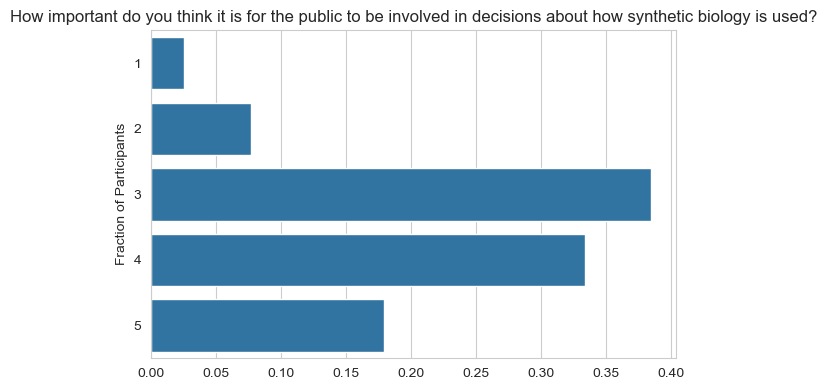

In [24]:
df[df.columns[16]] = pd.to_numeric(df[df.columns[16]], errors='coerce').astype('Int64')
fraction_plot(df, 16, df.columns[16])

#### How much say should ordinary citizens have in decisions about synthetic biology?

In [25]:
trust_map = {
    'A lot more than in the past': 5,
    'More': 4,
    'About the same': 3,
    'Slightly': 2,
    'Less': 1,
    'A lot less than in the past': 0,
    **{str(i): i for i in range(6)}
}

df[df.columns[17]] = pd.to_numeric(df[df.columns[17]].map(trust_map), errors='coerce').astype('Int64')

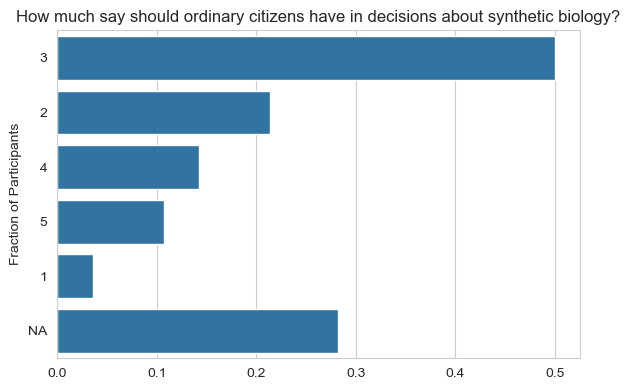

In [26]:
fraction_plot(df, 17, df.columns[17])

#### Do you believe public policy should influence scientific research 

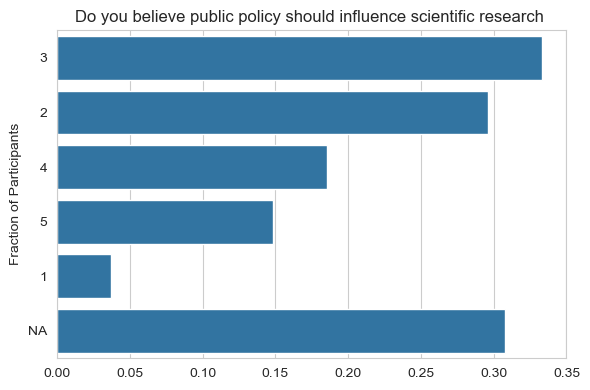

In [27]:
df[df.columns[18]] = pd.to_numeric(df[df.columns[18]], errors='coerce').astype('Int64')
fraction_plot(df, 18, df.columns[18])

#### What limits should we place on synthetic biology research to ensure it is ethical?

In [28]:
df_display(df, 19)

,What limits should we place on synthetic biology research to ensure it is ethical?
0,"Yes and no. Its important for people to be informed about the scientific breakthroughs, but its another thing for them to dictate research and inn..."
1,"Of course! There are a lot 🤔, like animal experiments, bioweapons, genetic privacy and data security…we need to be really cautious:)"
2,Yes but public policy should be driven by people who know and study what synthetic biology is. When people who don’t know what GMOs are make polic...
3,Governments should invest into synbio and make sure there are ethical committees in place so that scientists can regulate science. Those with know...
4,"Yes, as with many other scientific fields. Depends on the syn bio application but some potential big ones: avoidance of animal cruelty, careful do..."
5,The public should have a say in what the country is doing with synthetic biology- for example I wouldn't be comfortable with eating GM crops. Howe...
6,Don’t know enough about any policy to comment really.
7,Yes - I think it's important to independently asses the risk of research
8,"I believe public policy should influence scientific research in terms of directing it to the topics most important to society today, not necessari..."
9,Problem is there is alot of fear mongering and the public is likely to have more mistrust than trust. People are scared of ehat they hardly unders...


**Ethical limits suggested**
- **Animal welfare:** avoid or reduce cruelty (1, 4, 10, 20)  
- **Human protection:** no experiments on humans without consent, no “designer babies,” avoid enhancement for competition (12, 13, 15, 25, 29)  
- **Bioterrorism & safety:** ban bioweapons, ensure in-house testing, mandatory reporting, restrict risky tools (1, 3, 7, 25, 30, 31)  
- **Transparency & oversight:** ethical committees, independent risk assessment, longer trials, full transparency (3, 7, 14, 17, 18, 30, 32)  
- **Public role:** informed debate, public say in applications like GM crops, policy guided by experts but representative (0, 2, 5, 8, 9, 11)  

**Skeptical / dismissive**
- No limits or dismiss ethics/regulation entirely (23, 24, 26)  
- Hard to say / don’t know (6, 16, 22)  


#### Are there areas where you think synthetic biology should never be applied?

In [51]:
df_display(df, 20)

,Are there areas where you think synthetic biology should never be applied?\n
0,"No, however the use of synthetic biology and gene editing in in-vitro fertilization should be more strictly monitored given the direct pipeline to..."
1,I have no idea:( I always think it can be applied in any field 😢
2,I guess designer babies are a huge controversy. It’s a really long conversation but ultimately I think the use of genetic modification looks to cu...
3,No
4,Biological warfare and biosafety are very big concerns currently particularly with AI potentially expanding the number of people (I.e. not only se...
5,"Not really, researching and advancing should never stop."
6,Build your own baby?
7,I don't think it should be applied to toxins or weapons of violence
8,I believe it shouldn’t be applied in medical ways to anyone that doesn’t or can’t give consent to it
9,In the military / war


**Commonly mentioned “never apply” areas**
- **Human enhancement & reproduction:** designer babies, cloning, IVF misuse, “optimal” humans, reproduction/labour (0, 2, 6, 8, 12, 14, 15, 18, 20, 22, 26, 29)  
- **Weapons & warfare:** biological warfare, toxins, military/defense uses (4, 7, 9, 25, 31, 32)  

**Other concerns**
- Cosmetic or superficial purposes (25)  
- Applications without consent (8)  

**No limits / open use**
- No restrictions, research should continue freely (1, 3, 5, 16, 23)  

**Unsure / don’t know**
- Uncertain or no clear answer (10, 11, 30)  


#### In 50 years, if synthetic biology could completely reshape how we live, what change would you most want to see?

In [30]:
df_display(df, 21)

,"In 50 years, if synthetic biology could completely reshape how we live, what change would you most want to see?"
0,Environment. Preserving the Earth for future generations; reversing global warming and restoring the ozone layer.
1,"I most want to see its application in medicine:) like AIDS vaccine, eye drops for cataract…"
2,Widespread lab grown meat and materials. Just more sustainable manufacturing is such a major goal.
3,Revolution in the food industry
4,Improved drug discovery and production methods
5,Improvements in medicine and materials. Landfills are an important issue to adress.
6,Cures to genetic diseases?
7,\n\nIt would be nice to have synthetic organs so I could get a whole new set of fresh organs each year
8,"An abundance of healthy, high nutritional food"
9,"Affordable and accessible healthcare, and elimination of infectious diseases"


**Health & Medicine (18):** cures for diseases (1, 4, 5, 6, 9, 10, 11, 12, 13, 14, 15, 24, 25, 27, 30, 31, 32, 36, 37)  
**Organs & Longevity (4):** synthetic/replaceable organs, longer life, preventative therapies (7, 29, 33, 38)  
**Food & Sustainability (10):** lab-grown meat, abundant nutrition, cheaper/better crops, reduced hunger, sustainable production (2, 3, 5, 8, 16, 17, 18, 20, 23, 26, 34)  
**Environment (2):** reversing global warming, lower carbon footprint (0, 22)  
**Other (2):** convenience in daily life, eugenics concern (19, 35)  
**Unclear / no answer (2):** (21, 28)  


#### Have you ever changed your opinion about a scientific issue? What changed it?

In [31]:
df_display(df, 22)

,Have you ever changed your opinion about a scientific issue? What changed it?
0,Designer babies. see above for eurgenics argument.
1,"Yes I can’t give a specific answer but I do become more and more open minded about science, which is good:)"
2,"Biofuels. I used to be super passionate about the idea of making biofuels from cyanobacteria, and then I wrote a literature review about it and fo..."
3,I don’t know
4,Yes. Increased education - absolutely key for people to be able to make informed science decisions and actually understand what it means for a par...
5,I definitely changed my oppinion after having discussions with people.
6,If I saw the opinion I had was based of an incorrect or taken out of context source.
7,I was on the fence about synthetic meat but then the imperial Igem jamboree convinced me
8,Not that I can remember
9,"When I was younger, I rejected the evolution theories but mainly due to religious reasons. When I got older, I discovered religion had no basis an..."


**Changed via education / new evidence (18):** [0,1,2,4,6,9,17,18,22,26,28,29,30,31,32,33,34,37]  
**Changed via personal experience / discussion (5):** [5,7,23,25,36]  
**Never changed / steady trust (9):** [8,10,11,19,20,24,27,35,38]  
**Unsure / no clear answer (4):** [3,12,16,21]  


#### I would support funding for synthetic biology research.

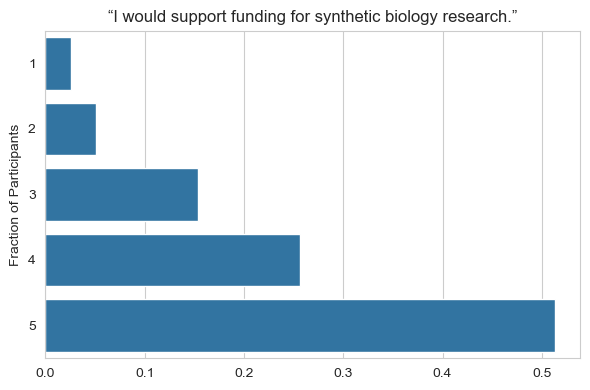

In [32]:
fraction_plot(df, 23, df.columns[23])

#### Any final thoughts?

In [33]:
df_display(df, 24)

,Any final thoughts?\n
0,keep rocking!
1,Go ahead iGEM imperial 2025!!! I’m looking forward to your wiki hehehe ☺️wish you guys good luck:)🍀
3,This form has too many abbreviations and fancy words. \nSomeone who has never heard of synbio or without at least a scientific background will nev...
9,Mechanisms should be drawn and established to ensure SynBio / EngBio is inclusive.
12,-
17,I’m still unsure about what exactly I’m funding
23,lets clone humans
33,:3


# Numerical Analysis

In [34]:
df_num = df.select_dtypes(include=['Int64', 'float']).copy()
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
How familiar are you with the area of synthetic biology?,39.0,2.948718,1.234349,1.0,2.0,3.0,4.0,5.0
What is your age?,28.0,23.714286,7.407989,17.0,21.0,22.0,23.25,56.0
How much do you trust science today compared to a few years ago?,39.0,3.333333,1.034493,1.0,3.0,3.0,4.0,5.0
How important do you think it is for the public to be involved in decisions about how synthetic biology is used?,39.0,3.564103,0.967767,1.0,3.0,4.0,4.0,5.0
How much say should ordinary citizens have in decisions about synthetic biology?,28.0,3.071429,0.978607,1.0,2.75,3.0,3.25,5.0
Do you believe public policy should influence scientific research,27.0,3.111111,1.120897,1.0,2.0,3.0,4.0,5.0
“I would support funding for synthetic biology research.”,39.0,4.179487,1.048101,1.0,4.0,5.0,5.0,5.0


#

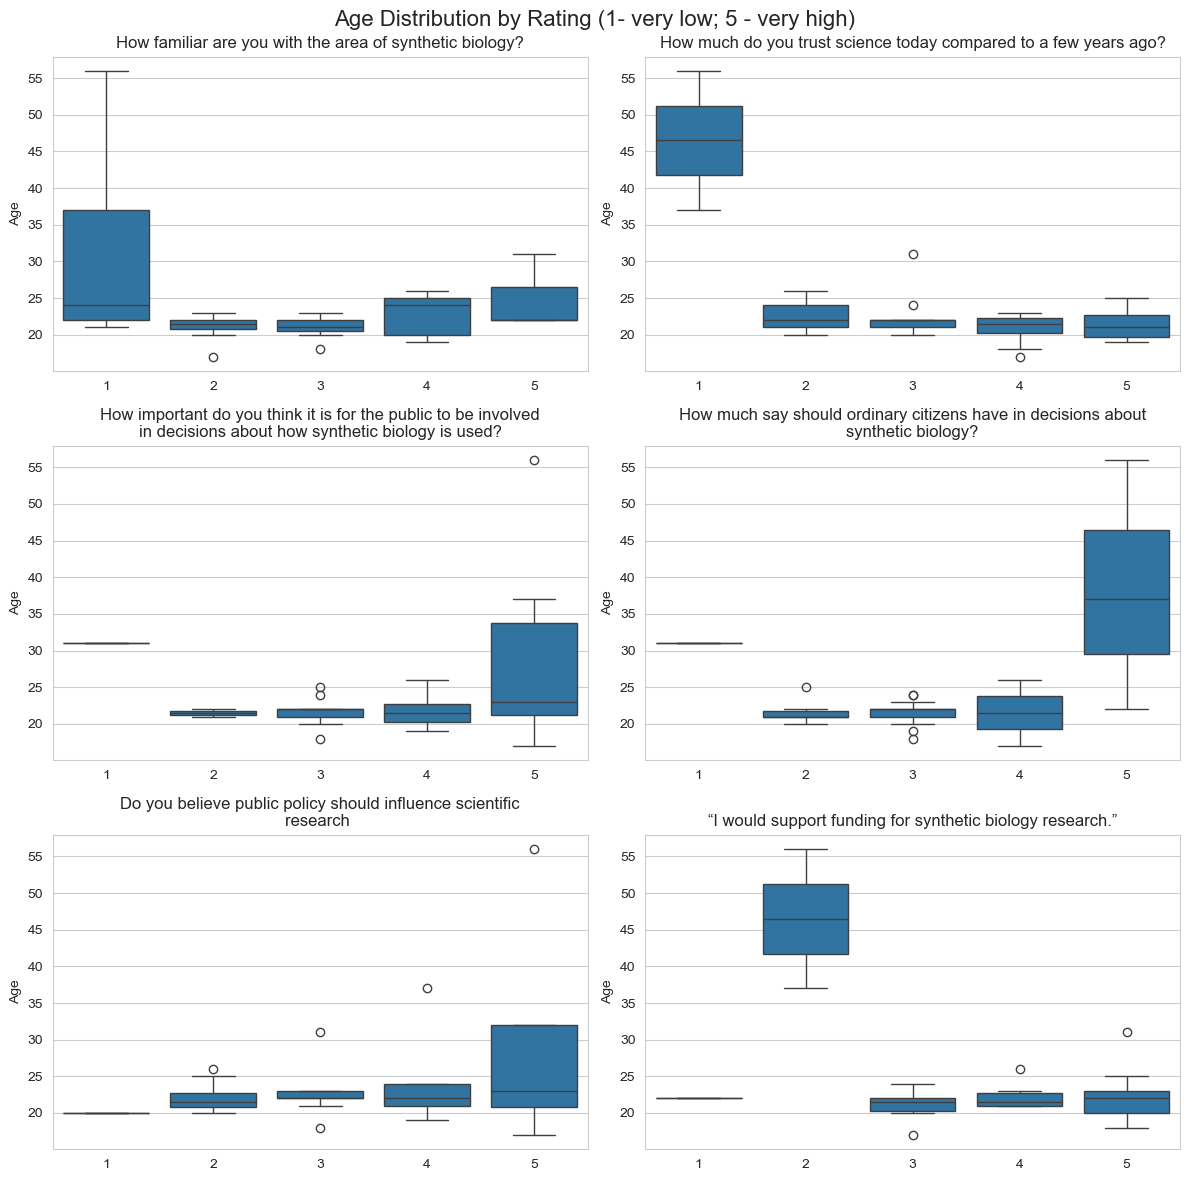

In [37]:
from src.plot_helpers import plot_dist_by_age


plot_dist_by_age(df_num)

df_num.drop(columns=["What is your age?"], inplace=True)  # Drop timestamp

* As a rule of thumb:
     * Younger people have a more positive outlook on science and synbio.
     * Older people tend to have more decisive views.
     * A lot of questions are identical???

<Figure size 1000x1000 with 0 Axes>

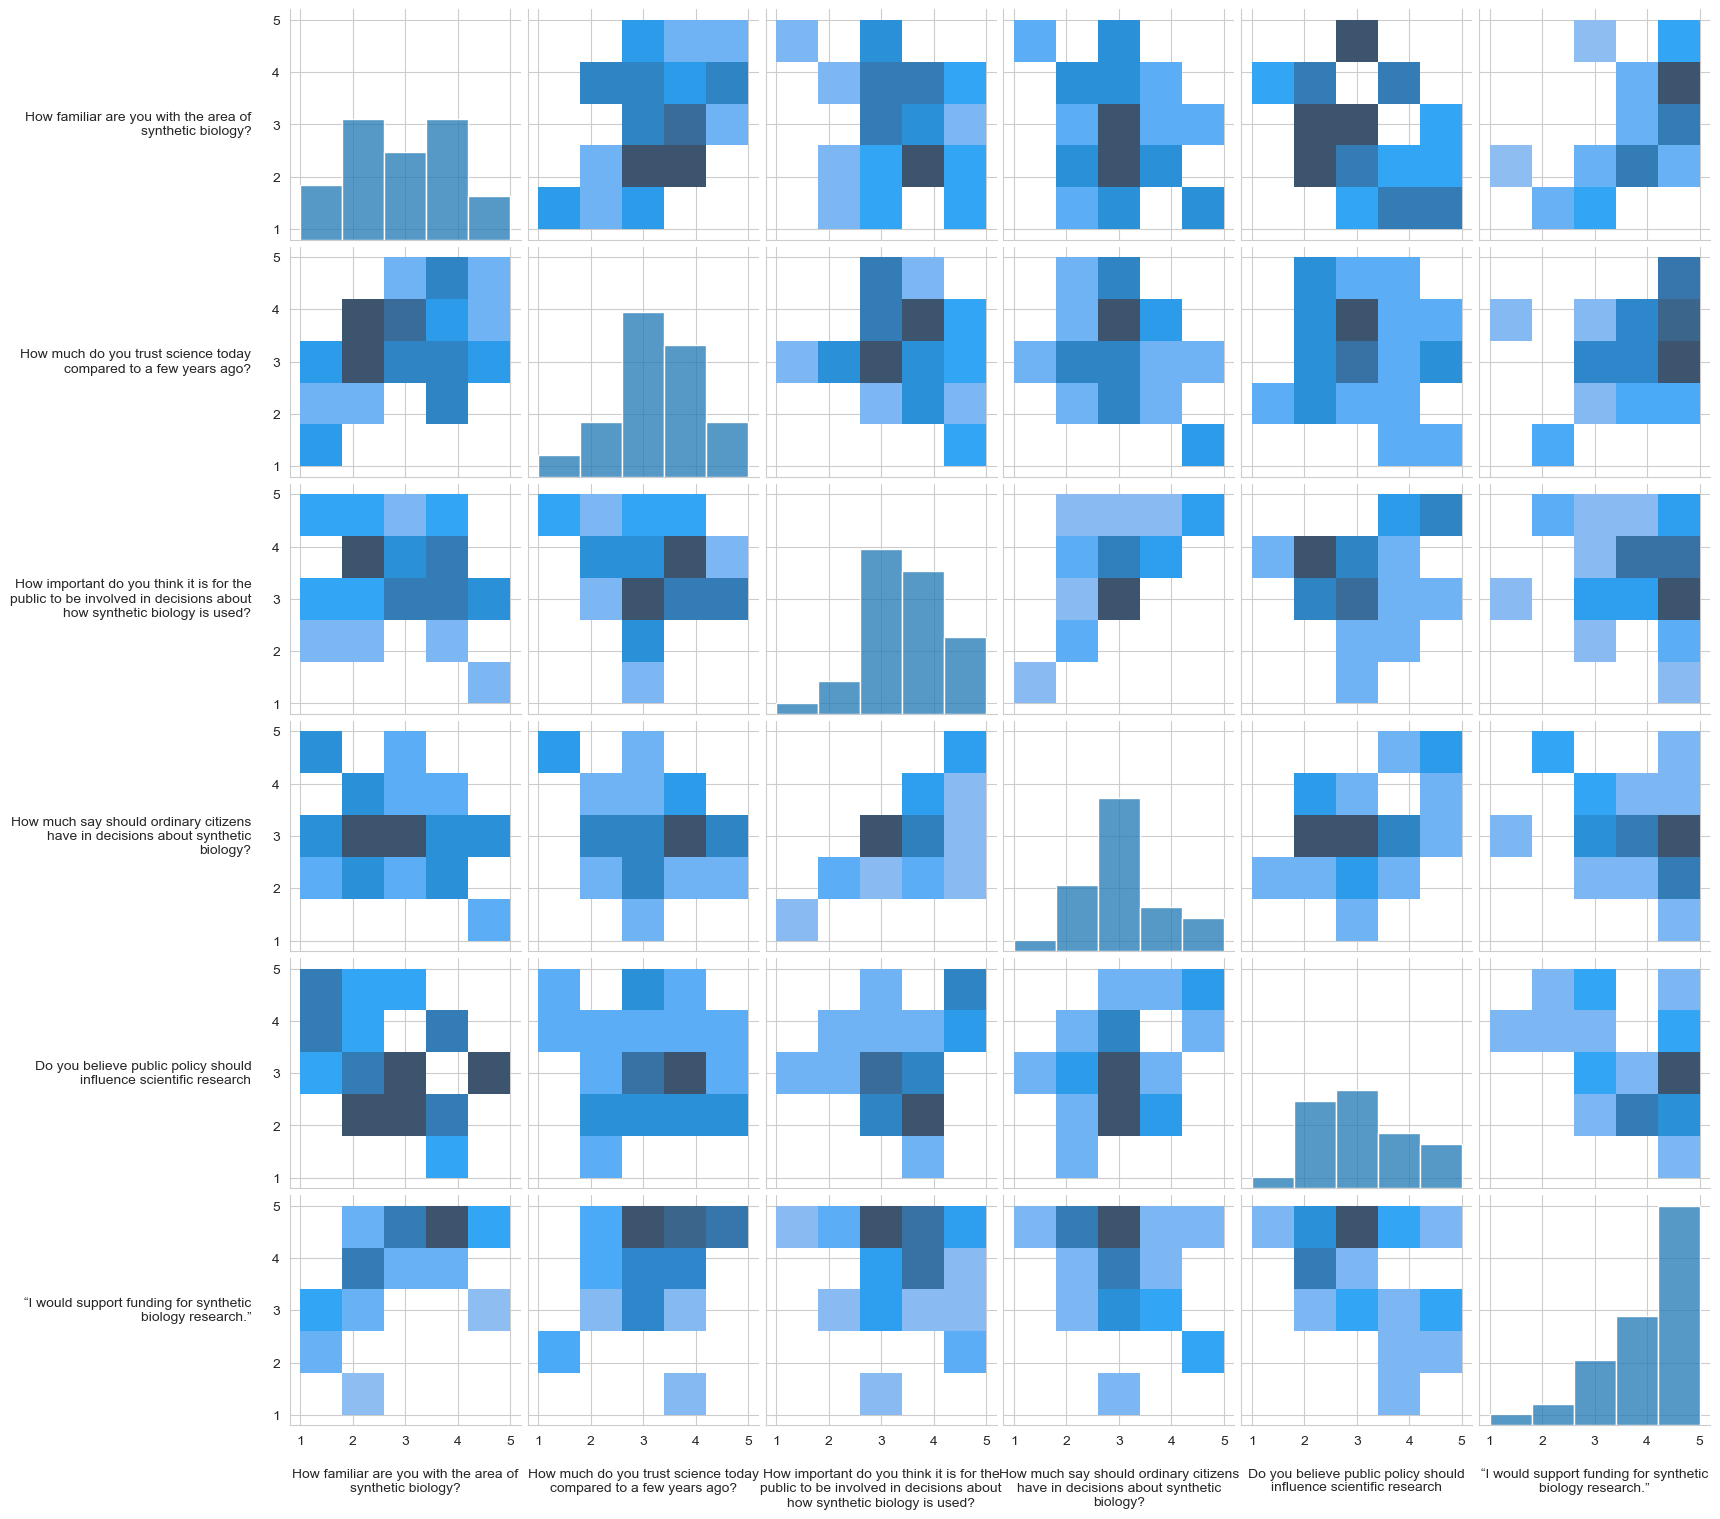

In [49]:
import textwrap


def numeric_pairplot(df_num):
    import textwrap
    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 10))
    g = sns.pairplot(df_num, kind="hist", diag_kind="hist", plot_kws={"bins": 5}, diag_kws={"bins": 5})

    def break_label(label, max_len=40):
        return "\n".join(textwrap.wrap(label, max_len))

    for ax in g.axes.flatten():
        if ax is not None:
            ax.set_xlabel(break_label(ax.get_xlabel()), rotation=0, ha='center', va='top', labelpad=15)
            ax.set_ylabel(break_label(ax.get_ylabel()), rotation=0, ha='right', va='center', labelpad=15)


numeric_pairplot(df_num)


* Identical questions on citizen involvement are very visible in distribution.
* The remaining distribution can be explained by Naive Bayes with some noise. i.e. there are no insightful interactions in the 2d plane